In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from numpy import genfromtxt
from torchdiffeq import odeint
import matplotlib.pyplot as plt

import scipy
import csv
import pandas as pd
import networkx as nx
import os
import random

In [12]:
# load random permutation testing result for distance between apoe+/- subjects
data_l = []

# open file and read the content in a list
with open('LOSS_M_list_group_10000.txt', 'r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        current_place = line[:-1]

        # add item to the list
        data_l.append(current_place)

In [13]:
data_float = list(map(float, data_l))

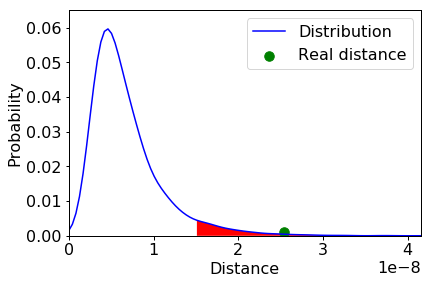

In [14]:
from scipy.stats import gaussian_kde
plt.rcParams.update({'font.size': 16,'xtick.major.width'   : 1,'ytick.major.width'   : 1,'axes.linewidth' : 1})
#plt.style.use('seaborn-whitegrid')
bins = 100
alpha = 0.05

dW = data_float
dW0 = data_float[0]

density = gaussian_kde(dW)
xs = np.linspace(0,np.max(data_float),bins)
density.covariance_factor = lambda : .25
density._compute_covariance()
ys = density(xs)/np.sum(density(xs))
y0 = 0.
for i,y in enumerate(ys):
    y0 = y0+y
    if y0>(1-alpha):
        break


bound = xs[i]
fig, ax = plt.subplots()
plt.tight_layout()
ax.plot(xs,ys,color = 'b',label = "Distribution")
#plt.plot([x], [y], marker='o', markersize=3, color="red",label="Real distance")
#plt.vlines(dW0,0,0.025,color = 'g',label="Real distance")
plt.xlim(0,np.max(data_float))
plt.ylim(0, 0.065)
#plt.title("Hypothesis Testing")
plt.xlabel("Distance")
plt.ylabel("Probability")
# plt.fill_between(xs,
#                  ys,
#                  where=(0<=xs) & (xs<=dW0),
#                  facecolor='b')
plt.fill_between(xs,
                 ys,
                 where=(xs>=bound),
                 facecolor='r')
s = ax.scatter(dW0, 0.0011, marker='o', color="g",s =90,label="Real distance")
ax.legend()
ax.grid('false')
plt.savefig("Survive.eps")
plt.show()

In [15]:
pvalue = 0
for i in range(0, len(xs)):
    if xs[i] > data_float[0]:
        pvalue = pvalue  + ys[i]

In [16]:
pvalue

0.0046671915369841

In [17]:
np.max(data_float)

4.159243e-08